**AD CLICK PREDICTION PROJECT**

MADE BY -

ABHISHEK JAIN (E23CSEU0265)

ANSH PANWAR (E23CSEU0256)

DEV THUKRAL (E23CSEU0258)

1. Related Work

The Ad Click Prediction task typically uses machine learning techniques to analyze user behavior and predict if a user will click on an ad. Here are a few key studies and approaches related to this area:

1.	Feature Engineering and User Profiling: Studies often focus on designing features based on user behavior, device type, geographical location, and timing. For example, creating features based on session frequency, recency, and interaction history is common.
2.	Use of Machine Learning Models: Widely used models for ad click prediction include Logistic Regression, Random Forests, Gradient Boosting Machines, and newer neural networks like deep feedforward networks. The choice of model often depends on the data’s complexity and the computational resources available.
3.	Deep Learning: Advanced neural network architectures, such as attention-based mechanisms, have shown success in capturing long-term dependencies and complex interactions among features in click prediction tasks. Models like DeepFM and Wide & Deep Learning, designed by Google, are also widely applied for ad click predictions.
4.	Data Imbalance and Handling: Since the number of actual clicks in an ad click dataset is usually much lower than non-clicks, handling data imbalance is a crucial step. Techniques like under-sampling, over-sampling, or using synthetic data generation (e.g., SMOTE) are common approaches.
5.	Data Privacy and Ethics: Given that ad click prediction often involves user-specific data, privacy-preserving techniques are critical. Techniques like federated learning or differential privacy are increasingly applied.

2. Data Pre-processing
  
  1. Missing Values:
	•	Age and Gender columns have missing values for a significant portion of entries (almost 50%).
	•	Device Type, Ad Position, Browsing History, and Time of Day also contain missing values, affecting around 20% of entries.

  2.	Data Types:
	•	Full Name and Browsing History are categorical and likely non-essential features (e.g., user identifiers and session contexts).
	•	Click is the target variable (binary: 0 for no click, 1 for a click).
	•	Other columns include both numerical (Age) and categorical variables (Gender, Device Type, Ad Position, Time of Day).

  3.	Basic Statistics:
	•	The Age variable has a mean of 40, with a range from 18 to 64.
	•	The Click variable has an imbalance, with more entries marked as 1 (clicks) than 0 (non-clicks).

In [4]:
import pandas as pd

# Load the dataset
file_path = 'ad_click_dataset.csv'
ad_click_data = pd.read_csv(file_path)

# Display the first few rows and summary information about the dataset
ad_click_data.head(), ad_click_data.info(), ad_click_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  int64  
 1   full_name         10000 non-null  object 
 2   age               5234 non-null   float64
 3   gender            5307 non-null   object 
 4   device_type       8000 non-null   object 
 5   ad_position       8000 non-null   object 
 6   browsing_history  5218 non-null   object 
 7   time_of_day       8000 non-null   object 
 8   click             10000 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 703.2+ KB


(     id full_name   age      gender device_type ad_position browsing_history  \
 0   670   User670  22.0         NaN     Desktop         Top         Shopping   
 1  3044  User3044   NaN        Male     Desktop         Top              NaN   
 2  5912  User5912  41.0  Non-Binary         NaN        Side        Education   
 3  5418  User5418  34.0        Male         NaN         NaN    Entertainment   
 4  9452  User9452  39.0  Non-Binary         NaN         NaN     Social Media   
 
   time_of_day  click  
 0   Afternoon      1  
 1         NaN      1  
 2       Night      1  
 3     Evening      1  
 4     Morning      0  ,
 None,
                  id          age         click
 count  10000.000000  5234.000000  10000.000000
 mean    5060.211400    40.197363      0.650000
 std     2861.758265    13.126420      0.476993
 min        5.000000    18.000000      0.000000
 25%     2529.000000    29.000000      0.000000
 50%     5218.000000    39.500000      1.000000
 75%     7466.000000    

3. Data Visualization
	1.	Age Distribution: The age distribution is slightly right-skewed, with most users falling between 25 and 55. There’s a slight peak around the 40s.
	2.	Gender Count: The dataset shows a fairly balanced distribution of gender categories, but some missing values need handling.
	3.	Click Distribution: As anticipated, the data is imbalanced, with more clicks (1) than non-clicks (0), which may require balancing.
	4.	Click Rate by Device Type: Desktop users appear to click ads more frequently than other device types, but there are some missing entries.
	5.	Click Rate by Time of Day: There seems to be a slight pattern, with more clicks occurring in the afternoon and evening.

<ipython-input-5-88570558ed01>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=data, palette='viridis', order=data['gender'].dropna().value_counts().index)
<ipython-input-5-88570558ed01>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='click', data=data, palette='coolwarm')


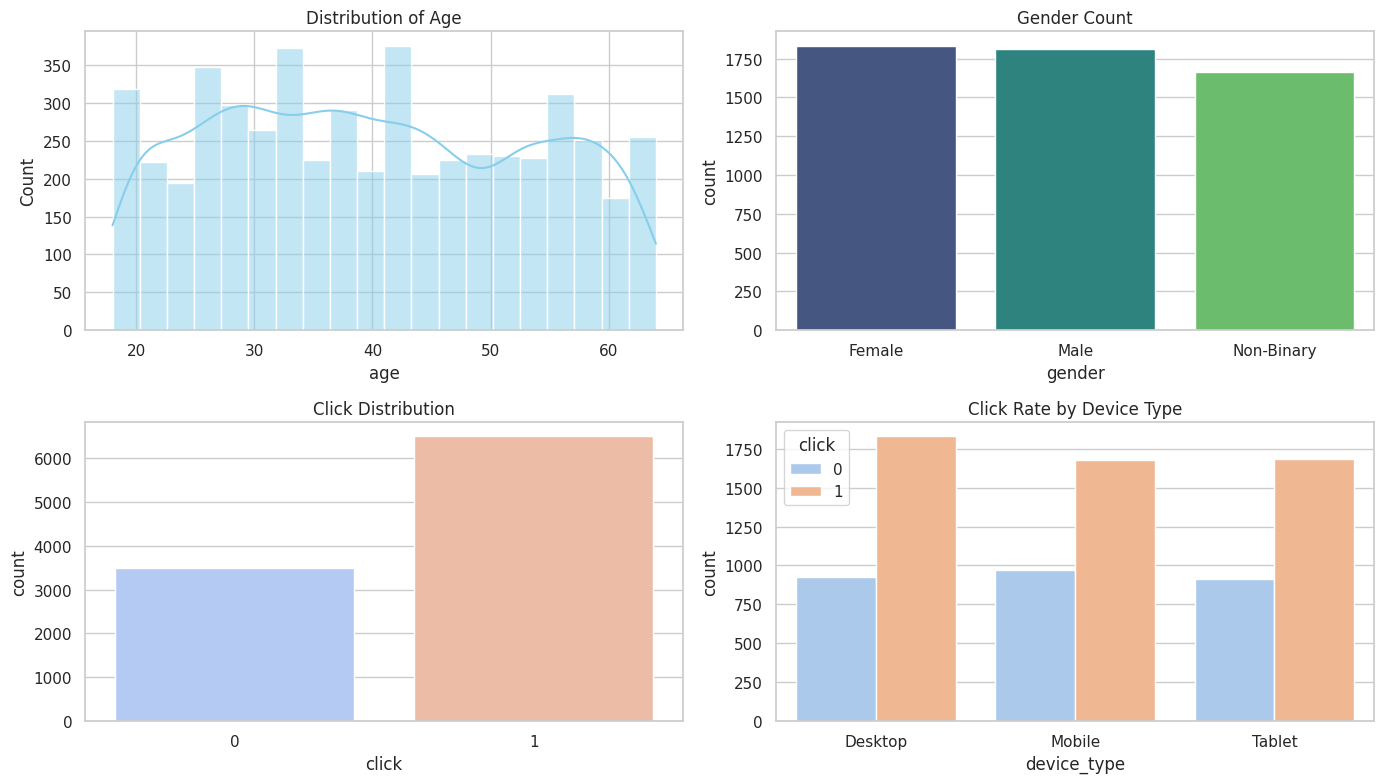

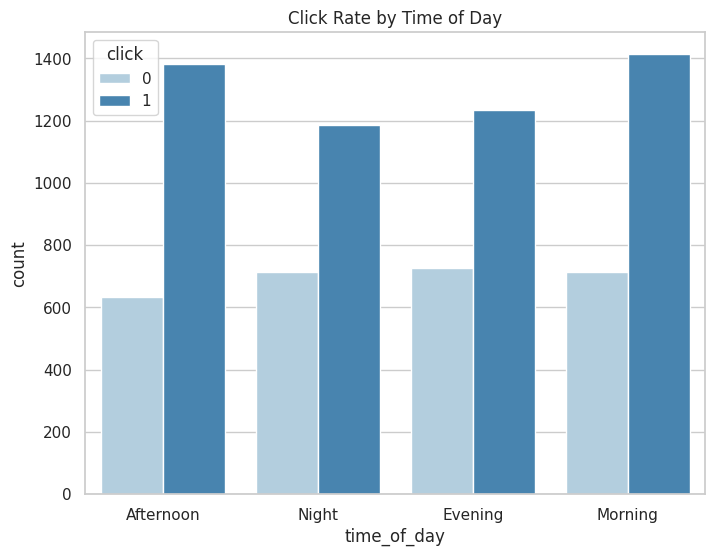

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('ad_click_dataset.csv')

# Set plot style
sns.set(style="whitegrid")

# 1. Distribution of Age
plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 1)
sns.histplot(data['age'].dropna(), bins=20, kde=True, color='skyblue')
plt.title("Distribution of Age")

# 2. Distribution of Gender
plt.subplot(2, 2, 2)
sns.countplot(x='gender', data=data, palette='viridis', order=data['gender'].dropna().value_counts().index)
plt.title("Gender Count")

# 3. Click Rate Distribution
plt.subplot(2, 2, 3)
sns.countplot(x='click', data=data, palette='coolwarm')
plt.title("Click Distribution")

# 4. Click Rate by Device Type
plt.subplot(2, 2, 4)
sns.countplot(x='device_type', hue='click', data=data, palette='pastel')
plt.title("Click Rate by Device Type")

plt.tight_layout()
plt.show()

# Separate plot for Time of Day and Click analysis
plt.figure(figsize=(8, 6))
sns.countplot(x='time_of_day', hue='click', data=data, palette='Blues')
plt.title("Click Rate by Time of Day")
plt.show()

4. Model Creation & Testing
  1.	Logistic Regression: A linear model often used as a baseline for binary classification tasks.
  2.	Random Forest: An ensemble model based on decision trees, which is effective for handling non-linear relationships and is generally robust to overfitting.
  3.	Gradient Boosting: Another ensemble method that builds models sequentially to improve predictive accuracy, often achieving high performance on structured data.

Each model is evaluated on metrics such as accuracy, precision, recall, and F1 score. These models offer a good starting variety, ranging from simpler linear approaches to more complex ensemble methods.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Load the dataset
data = pd.read_csv('ad_click_dataset.csv')

# Step 1: Data Pre-processing

# Define numerical and categorical features
numerical_features = ['age']
categorical_features = ['gender', 'device_type', 'ad_position', 'time_of_day']

# Imputers for missing values
numerical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median'))])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Splitting features and target variable
X = data[['age', 'gender', 'device_type', 'ad_position', 'time_of_day']]
y = data['click']

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Model Training and Evaluation

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Dictionary to store evaluation results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Pipeline with preprocessor and model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Predict on test data
    y_pred = pipeline.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Store results
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Classification Report': class_report
    }

# Display results
for model_name, metrics in results.items():
    print(f"Results for {model_name}:")
    print(f"Accuracy: {metrics['Accuracy']}")
    print(f"Precision: {metrics['Precision']}")
    print(f"Recall: {metrics['Recall']}")
    print(f"F1 Score: {metrics['F1 Score']}")
    print("Classification Report:\n", metrics['Classification Report'])
    print("\n" + "-"*50 + "\n")

Results for Logistic Regression:
Accuracy: 0.648
Precision: 0.647823911955978
Recall: 1.0
F1 Score: 0.7862780813600486
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00       705
           1       0.65      1.00      0.79      1295

    accuracy                           0.65      2000
   macro avg       0.82      0.50      0.39      2000
weighted avg       0.77      0.65      0.51      2000


--------------------------------------------------

Results for Random Forest:
Accuracy: 0.7115
Precision: 0.721604938271605
Recall: 0.9027027027027027
F1 Score: 0.8020583190394511
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.36      0.47       705
           1       0.72      0.90      0.80      1295

    accuracy                           0.71      2000
   macro avg       0.70      0.63      0.64      2000
weighted avg       0.70      0.71      0.68      200